# Páginas para programar python

1. www.mybinder.org
2. www.kaggle.com
3. www.jupyter.org/try
4. `github jobish` https://mybinder.org/v2/gh/jobish03/jobish03-Visualizacion_de_datos_para_la_toma_de_decisiones/main?filepath=welcome_binder.ipynb

Los paquetes hay que incluir en el archivo `requirements.txt`

# Actividad 10: Presentación final
#### Victor Noé González Muñoz - A01283565
### Data set - "Amazon Bestselling Books 2009-2019"
#### Esta es una base de datos con 7 columnas y 550 filas

In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
%ls datasets/

adult.csv                  Cartwheeldata.csv  mic.xlsx
airline_data.csv           census.csv         movies.csv
AmazonBestsellers.csv      coches.csv         nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv       pokemon.csv
antropometria-dataset.csv  data.csv           sample_pivot.csv
Book3.csv                  headbrain.csv      tips.csv
Canada.xlsx                mic2.xlsx          weight-height.csv


In [12]:
df = pd.read_csv('datasets/AmazonBestsellers.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


### Tipos de variables
##### Name: Tipo "Object" - Nos dice el nombre del libro
##### Author: Tipo "Object" - Nos dice el autor del libro
##### User Rating: Tipo "Float" - Nos dice la calificación que le han otorgado los usuarios
##### Reviews: Tipo "Integer" - Nos dice la cantidad de críticas que ha recibido el libro
##### Price: Tipo "Integer" - Nos dice el precio en USD del libro
##### Year: Tipo "Integer" - Nos dice el año en el que salió a la venta en Amazon
##### Genre: Tipo "Object" - Nos dice si es libro de ficción o no ficción

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,550.0,4.618364,0.226980,3.3,4.5,4.7,4.80,4.9
Reviews,550.0,11953.281818,11731.132017,37.0,4058.0,8580.0,17253.25,87841.0
Price,550.0,13.100000,10.842262,0.0,7.0,11.0,16.00,105.0
Year,550.0,2014.000000,3.165156,2009.0,2011.0,2014.0,2017.00,2019.0


### Hallazgo 1
#### Encontramos que nuestra base de datos cuenta con un promedio de aproximadamente 12,000 críticas con una media de calificación de 4.6 estrellas y un promedio de precio de libros de 13 USD.
#### Sobre el precio de los libros, me parece interesante notar el que dentro de nuestros datos se encuentran desde libros gratuitos hasta libros de 105 USD

In [126]:
#pip install seaborn

In [16]:
import seaborn as sns

## Pregunta 1: ¿Cuáles son los 10 libros con mayor cantidad de críticas y cuál fue su calificación media?

In [41]:
pivot = pd.pivot_table(df,
                       index = ['Name','Author','Genre'],
                       values = ['Reviews','User Rating'],
                       aggfunc = {'Reviews':['sum'],'User Rating':['mean']}
                      )

In [42]:
libros = pivot.sort_values(('Reviews','sum'),ascending=False)
top10L = libros.head(10)
top10L

,,,Reviews,User Rating
,,,sum,mean
Name,Author,Genre,,
The Fault in Our Stars,John Green,Fiction,201928,4.7
"Oh, the Places You'll Go!",Dr. Seuss,Fiction,174672,4.9
Gone Girl,Gillian Flynn,Fiction,171813,4.0
The Girl on the Train,Paula Hawkins,Fiction,158892,4.1
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",Laura Hillenbrand,Non Fiction,148365,4.8
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),Don Miguel Ruiz,Non Fiction,139848,4.7
The Very Hungry Caterpillar,Eric Carle,Fiction,136822,4.9
To Kill a Mockingbird,Harper Lee,Fiction,131170,4.8


In [19]:
top10L.describe().T

,,count,mean,std,min,25%,50%,75%,max
Reviews,sum,10.0,151628.50,24914.224220,125005.0,132583.0,144106.50,168582.75,201928.0
User Rating,mean,10.0,4.64,0.320416,4.0,4.7,4.75,4.80,4.9


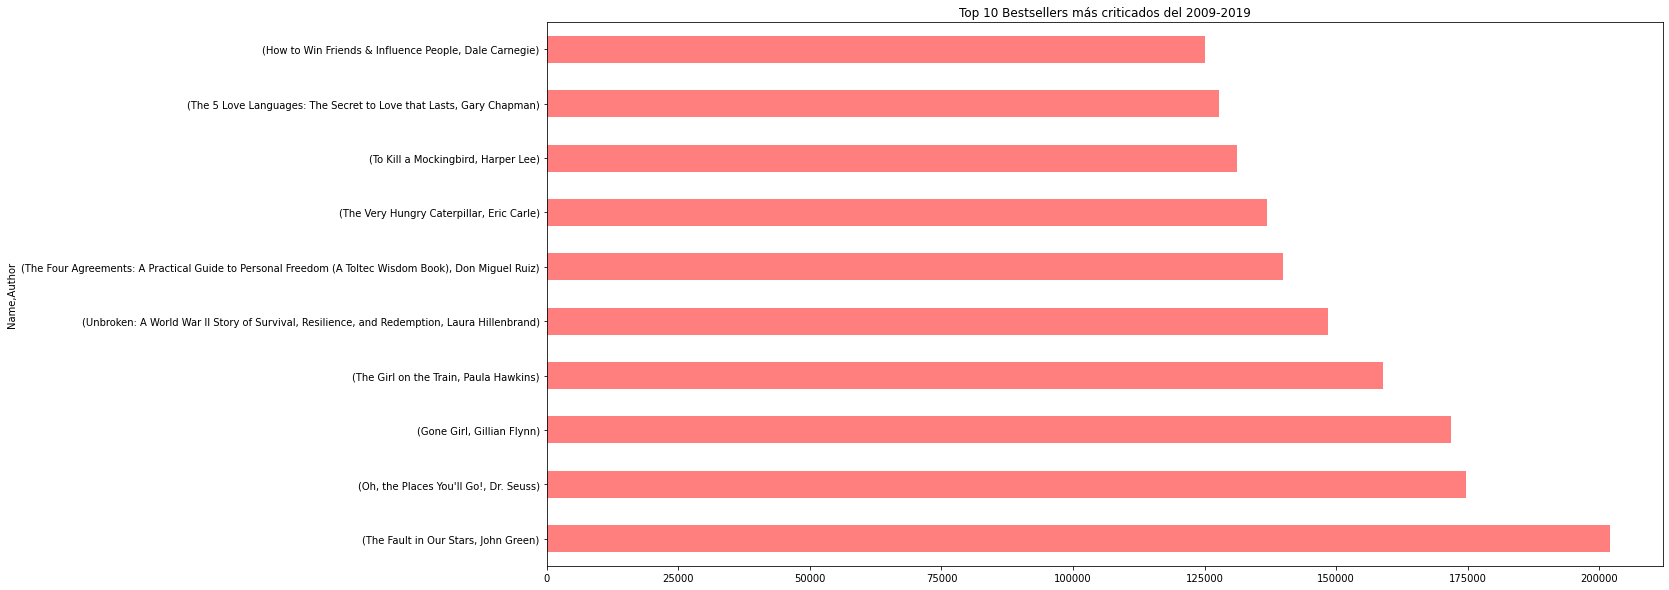

In [20]:
top10L[('Reviews','sum')].plot(kind='barh',
                              figsize = (20,10),
                               color = 'r',
                               alpha = 0.5
                              ).set(title='Top 10 Bestsellers más criticados del 2009-2019')
tamaño = 15
plt.rc('axes', titlesize=tamaño)

#### - La calificación media de los libros con más críticas es de 4.64 y varían de 4 hasta 4.9 estrellas.

## Pregunta 2: ¿Cuáles son los 10 autores más criticados y cuál es la calificación media de sus libros?

In [21]:
pivot1 = pd.pivot_table(df,
                       index = ['Author'],
                       values = ['Reviews','User Rating'],
                       aggfunc = {'Reviews':['sum'],'User Rating':['mean']}
                      )

In [22]:
autores = pivot1.sort_values(('Reviews','sum'),ascending=False)
top10a = autores.head(10)
top10a

,Reviews,User Rating
,sum,mean
Author,,
Suzanne Collins,278329,4.663636
John Green,210419,4.660000
E L James,178011,4.233333
Dr. Seuss,176545,4.877778
Gillian Flynn,171813,4.000000
Paula Hawkins,158892,4.100000
Laura Hillenbrand,148365,4.800000
Harper Lee,146152,4.600000


In [23]:
top10a.describe().T

,,count,mean,std,min,25%,50%,75%,max
Reviews,sum,10.0,175433.200000,41940.858037,139848.0,146705.250,165352.500000,177644.500000,278329.000000
User Rating,mean,10.0,4.537111,0.308815,4.0,4.325,4.661818,4.727273,4.877778


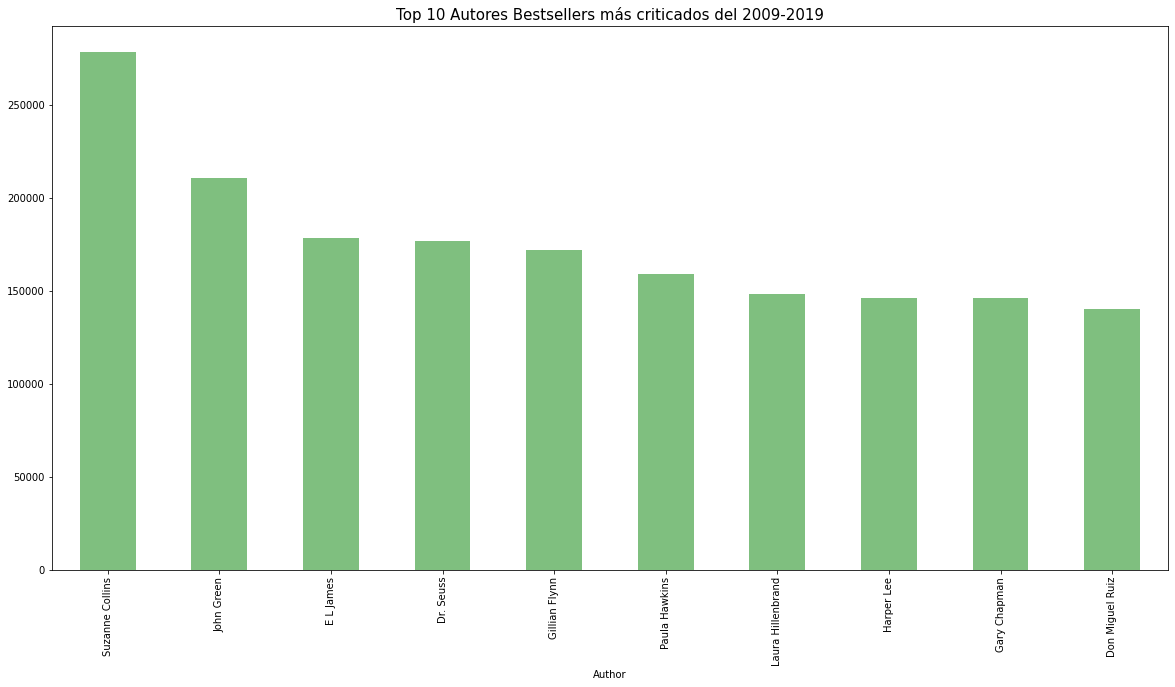

In [43]:
top10a[('Reviews','sum')].plot(kind='bar',
                              figsize = (20,10),
                               color = 'g',
                               alpha = 0.5
                              ).set(title='Top 10 Autores Bestsellers más criticados del 2009-2019')
tamaño = 15
plt.rc('axes', titlesize=tamaño)

### Hallazgo 2
#### Los libros y autores más criticados, tienen una calificación promedio de aproximadamente 4.5 estrellas (5 es la calificación máxima).

## Pregunta 3: ¿Existe una relación entre el precio y la calificación del usuario al libro?

Text(0, 0.5, 'Price')

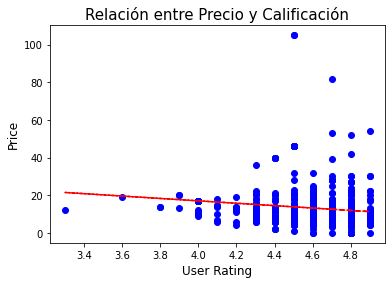

In [25]:
x = df['User Rating'].values
y = df['Price'].values
plt.scatter(x,y,color='b')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Relación entre Precio y Calificación',fontsize=15)
plt.xlabel('User Rating',fontsize=12)
plt.ylabel('Price',fontsize=12)

### Hallazgo 3
#### Se observa una ligera tendencia negativa en el análisis de dispersión, lo que quiere decir que los libros de menor precio suelen ser los mejores calificados.

In [26]:
pivot2 = pd.pivot_table(df,
                       index = ['User Rating'],
                       values = ['Price','Reviews'],
                       aggfunc = {'Price':['mean'],'Reviews':['mean']}
                      )
pivot2

,Price,Reviews
,mean,mean
User Rating,,
3.3,12.000000,9372.000000
3.6,19.000000,14982.000000
3.8,14.000000,47265.000000
3.9,17.666667,24666.000000
4.0,14.642857,17376.142857
4.1,11.666667,32384.166667
4.2,11.625000,4283.500000
4.3,13.280000,8362.880000


### Hallazgo 3.1
#### Los libros más baratos tienen en promedio mejor calificación.

## Pregunta 4: ¿Qué genero tiene mejor calificación por el usuario?

In [28]:
pivot3 = pd.pivot_table(df,
                        index = ['Name'],
                        columns = ['Genre'],
                        values = ['User Rating'],
                        aggfunc = {'User Rating':['median']}
                      )

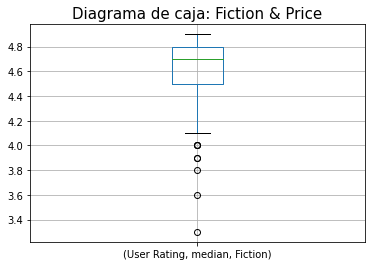

In [29]:
boxplot = pivot3.boxplot(column=[('User Rating', 'median', 'Fiction')]).set(title='Diagrama de caja: Fiction & Price')

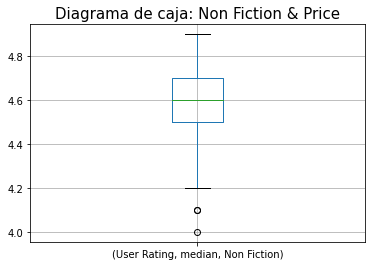

In [30]:
boxplot = pivot3.boxplot(column=[('User Rating', 'median', 'Non Fiction')]).set(title='Diagrama de caja: Non Fiction & Price')

### Hallazgo 4
#### Se puede observar que ligeramente, los libros de ficción tienen mejor calificación que los que no son ficción.

## Pregunta 5: ¿Cómo han variado las críticas con el paso del tiempo?

In [31]:
pivot4 = pd.pivot_table(df,
                        index = ['Year'],
                        columns = ['Genre'],
                        values = ['Reviews'],
                      )

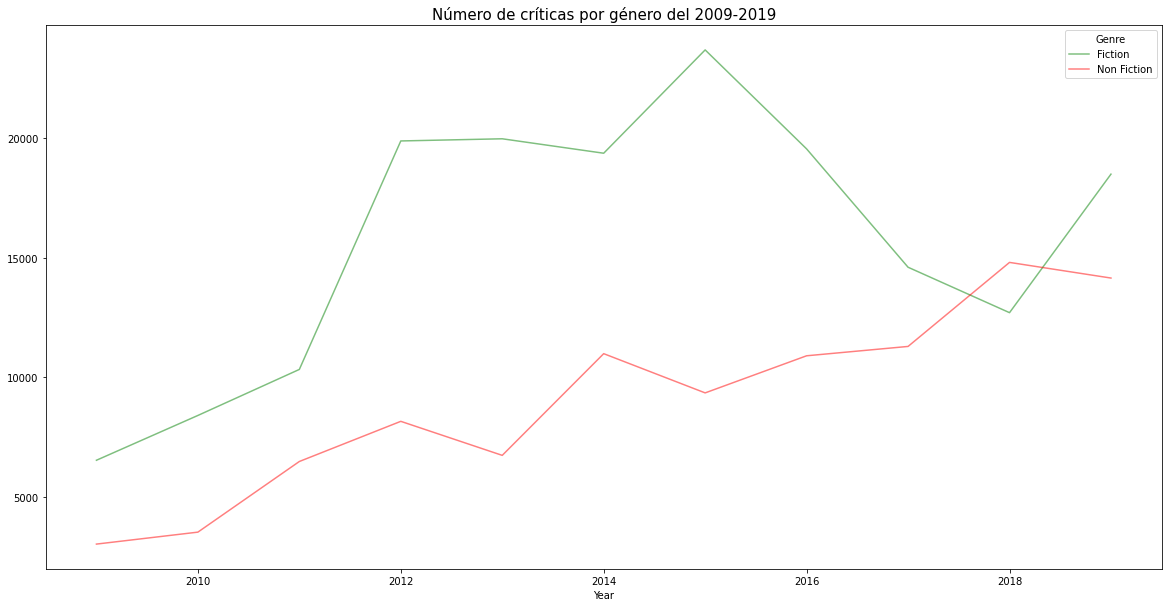

In [36]:
pivot4[('Reviews')].plot(kind='line',
                              figsize = (20,10),
                               color = ['g','r'],
                               alpha = 0.5
                              ).set(title='Número de críticas por género del 2009-2019')
tamaño = 15
plt.rc('axes', titlesize=tamaño)

### Hallazgo 5
#### - El género de ficción es el más criticado con el paso del tiempo. 
#### - En los libros de ficción se observan picos en las críticas del 2012 hasta el 2015.
#### - Mientras que en los libros que no son de ficción muestran una tendencia constante y positiva. 

## Pregunta 6: ¿Cuál es el impacto del género, año y cantidad de críticas en el precio del libro?

In [53]:
#pip install sklearn

In [54]:
import statsmodels.api as sm
from sklearn import linear_model

In [105]:
modelA = sm.OLS.from_formula('Price ~ Genre + Year + Reviews',data = df)
resultA = modelA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     11.33
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           3.23e-07
Time:                        07:07:55   Log-Likelihood:                -2074.2
No. Observations:                 550   AIC:                             4156.
Df Residuals:                     546   BIC:                             4174.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1066.2718    298.340      3.574      0.000     480.238    1652.306
Genre[T.Non Fiction]     3.9502      0.950      4.159      0.000       2.085       5.816
Year                    -0.5239      0.148     -3.535      0.000      -0.815      -0.233
Reviews              -1.684e-05   4.17e-05     -0.404      0.686   -9.87e-05     6.5e-05
==============================================================================
Omnibus:                      476.498   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13384.879
Skew:                           3.713   Prob(JB):                         0.00
Kurtosis:                      25.998   Cond. No.                     1.11e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observaciones:
* Variable dependiente: Price
*Variable independiente: Genre, Year, Reviews
*R-squared: 0.059; por lo tanto, este modelo no es para nada eficiente. Explica únicamente el 5.9% del precio.
*Df Model: 3
*Intercept: 1066.2718 > 0.05, no es estadísticamente significativo 

`Price = 1066.2718 + 3.9502*Genre_Non Fiction - 0.5239*Year - 1.684e-05*Reviews`

### Case study 1 - "10-Day Green Smoothie Cleanse":
Df Model: 3
* Genre = Non Fiction
* Year = 2016
* Reviews = 17350

In [116]:
print('Precio de un libro de no ficción, del 2016 con 17350 crítcas \t', 1066.2718 + 3.9502*1 - 0.5239*2016 - 1.684e-05*17350)

Precio de un libro de no ficción, del 2016 con 17350 crítcas 	 13.747425999999837


In [118]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Case study 2 - "5000 Awesome Facts":
Df Model: 3
* Genre = Non Fiction
* Year = 2015
* Reviews = 7665

In [125]:
print('Precio de un libro de no ficción, del 2019 con 7665 crítcas \t', 1066.2718 + 3.9502*1 - 0.5239*2019 - 1.684e-05*7665)

Precio de un libro de no ficción, del 2019 con 7665 crítcas 	 12.338821399999873


## Conclusión:
#### - Con esta base de datos y con las variables que se cuentan, es complicado predecir el precio de un libro. El modelo creado en la parte superior no es confiable. 
#### - Que un libro o un autor cuente con tantas críticas, no quiere decir que sea malo. Al contrario, los libros y autores más criticados, tienen una calificación promedio de aproximadamente 4.5 estrellas (5 es la calificación máxima).
#### - Los libros con precio por debajo del promedio (13 USD) tienden a tener una calificación media de 4.6 a 4.9 estrellas.
#### - Con el paso del tiempo, los usuarios dejan una menor cantidad de críticas en los libros de ficción y muestran un mayor interés por los libros que no son de ficción. 